In [1]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt

In [2]:
N = 10
r = 0.1

In [3]:
def rand_init(N):
    bodies = np.zeros((N, 4))
    for i in range(N):
        for j in range(4):
            bodies[i, j] = rd.random()
    bodies[:, :] *= 10.
    return bodies

In [4]:
#bodies = np.array([[1, 1, 5, 5], [5, 1, -5, 5], [9, 1, 0, -1]], dtype = float)
bodies = rand_init(N)

In [5]:
def wall_collision(body):
    if body[0] <= r or body[0] >= 10. - r:
        body[2] *= -1.
    if body[1] <= r or body[1] >= 10. - r:
        body[3] *= -1.
    return body

In [6]:
def all_wall_collision(bodies):
    for i in range(N):
        bodies[i] = wall_collision(bodies[i].copy())
    return bodies

In [7]:
def collision(body1, body2):
    
    tan = abs(body1[1]-body2[1]) / abs(body1[0]-body2[0])
    alpha = np.arctan(tan)
    
    vel1_x_init = body1[2]
    vel2_x_init = body2[2]
    vel1_y_init = body1[3]
    vel2_y_init = body2[3]
    
    vel1_x_new = -vel1_y_init * np.sin(alpha) + vel1_x_init * np.cos(alpha) 
    vel2_x_new = -vel2_y_init * np.sin(alpha) + vel2_x_init * np.cos(alpha) 
    vel1_y_new = vel1_y_init * np.cos(alpha) + vel1_x_init * np.sin(alpha) 
    vel2_y_new = vel2_y_init * np.cos(alpha) + vel2_x_init * np.sin(alpha) 

    vel1_x_new_comm = vel2_x_new
    vel2_x_new_comm = vel1_x_new 
    vel1_y_new_comm = vel1_y_new 
    vel2_y_new_comm = vel2_y_new 
    
    vel1_x_init_comm = vel1_y_new_comm * np.sin(alpha) + vel1_x_new_comm * np.cos(alpha)
    vel2_x_init_comm = vel2_y_new_comm * np.sin(alpha) + vel2_x_new_comm * np.cos(alpha)
    vel1_y_init_comm = vel1_y_new_comm * np.cos(alpha) - vel1_x_new_comm * np.sin(alpha)
    vel2_y_init_comm = vel2_y_new_comm * np.cos(alpha) - vel2_x_new_comm * np.sin(alpha)
    
    body1[2] = vel1_x_init_comm
    body1[3] = vel1_y_init_comm
    body2[2] = vel2_x_init_comm
    body2[3] = vel2_y_init_comm
    
    return body1, body2

In [8]:
def move(body, dt):
    body[0] += body[2] * dt
    body[1] += body[3] * dt
    return body

In [9]:
def move_all(bodies, dt):
    for i in range(N):
        bodies[i] = move(bodies[i].copy(), dt)
    return bodies

In [10]:
def wait_nearest_wall_collision(bodies):
    def wait_for_one(body):
        if body[2] > 0:
            t_x = (10 - r - body[0]) / body[2]
        else:
            t_x = (r - body[0]) / body[2]
        if body[3] > 0:
            t_y = (10 - r - body[1]) / body[3]
        else:
            t_y = (r - body[1]) / body[3]
        print(t_x, t_y)
        return min(t_x, t_y)
    times = np.array([wait_for_one(body) for body in bodies])
    return min(times)

In [11]:
def wait_nearest_ball_collision(bodies):
    def calculate(body1, body2):
        a = (body2[2] - body1[2]) ** 2 + (body2[3] - body1[3]) ** 2
        b = 2. * (body2[0] - body1[0]) * (body2[2] - body1[2]) + 2. * (body2[1] - body1[1]) * (body2[3] - body1[3])
        c = (body2[0] - body1[0]) ** 2 + (body2[1] - body1[1]) ** 2 - 4. * r ** 2
        D = b ** 2 - 4. * a * c
        if D > 0:
            t1 = (-b + np.sqrt(D)) / 2. / a
            if t1 < 0:
                t1 = np.inf
            t2 = (-b - np.sqrt(D)) / 2. / a
            if t2 < 0:
                t2 = np.inf
            return min(t1, t2)
        elif D == 0:
            t = -b / 2. / a
            if t < 0:
                t = np.inf
            return t
        else: return np.inf
    t_min = np.inf
    i_min, j_min = 0, 0
    for i in range(N):
        for j in range(i):
            t = calculate(bodies[i], bodies[j])
            if t < t_min:
                t_min, i_min, j_min = t, i, j
    return t, i, j

1.2165187274099287 0.05133303637980558
2.991749681330251 2.0787901928547
29.31283921382914 0.2636698984570101
1.9392590072134277 0.8209107932461585
0.3470174196079243 1.0250758304468393
1.2567787381862103 0.6667871163090229
2.5413864452215646 1.2652979261225177
1.9884481308972384 1.115245025521417
0.5048565469363725 2.003213172329836
0.08572219684565494 1.333198666079182
0.05133303637980558 inf
1.165185691030123 1.8485222305573474
2.9404166449504454 2.0274571564748944
29.26150617744933 0.21233686207720454
1.8879259708336222 0.7695777568663529
0.2956843832281188 0.9737427940670337
1.2054457018064049 0.6154540799292174
2.490053408841759 1.2139648897427122
1.937115094517433 1.0639119891416113
0.45352351055656687 1.9518801359500335
0.0343891604658491 1.2818656296993762
0.0343891604658491 inf
1.130796530564274 1.8141330700914984
2.9060274844845964 1.9930679960090456
29.22711701698348 0.1779477016113554
1.8535368103677732 0.7351885964005038
0.2612952227622698 0.9393536336011846
1.17105654134

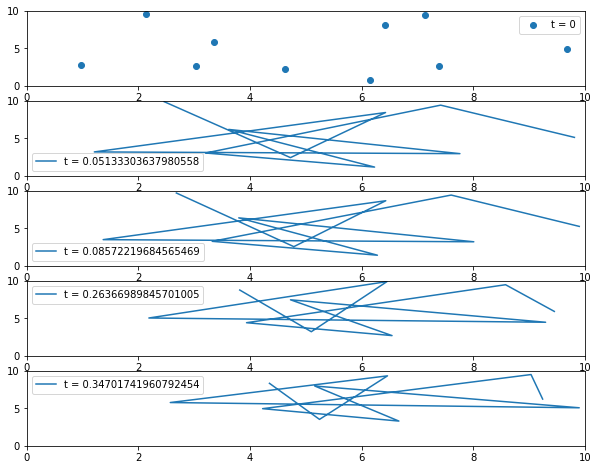

In [14]:
K = 5
fig, axs = plt.subplots(K, 1, figsize = (10, 8))
axs[0].set_xlim([0, 10])
axs[0].set_ylim([0, 10])
t_prev = 0
axs[0].scatter(bodies[:, 0], bodies[:, 1], label = 't = ' + str(t_prev));
axs[0].legend()
for k in range(1, K):
    t_wall = wait_nearest_wall_collision(bodies)
    t_coll, i, j = wait_nearest_ball_collision(bodies)
    print(t_wall, t_coll)
    if (t_wall < t_coll):
        bodies = move_all(bodies, t_wall)
        bodies = all_wall_collision(bodies.copy())
        t_prev += t_wall
    else:
        bodies = move_all(bodies, t_coll)
        bodies[i], bodies[j] = collision(bodies[i].copy(), bodies[j].copy())
        t_prev += t_coll
    axs[k].set_xlim([0, 10])
    axs[k].set_ylim([0, 10])
    axs[k].plot(bodies[:, 0], bodies[:, 1], label = 't = ' + str(t_prev));
    axs[k].legend()